# Financial Inclusion in Africa Starter Notebook

## About Dataset
### Column Description
- Country: Country interviewee is in

- year: Year survey was done in

- uninqueid: Unique identifier for each interviewee

- location_type: Type of location (Rural or Urban)

- cellphone_access: if interviewee has acces to a cellphone(Yes, No)

- household_size: Number of people living in one house

- age_of_respondent: the age of the interviewee
- gender_of_respondent: gender of interviewee(Male or Female)

- relationship_with_head: The interviewee's relationship with the head of the house(:Head of Household, Spouse, Child, Parent, Other relative, Other non-relatives, Dont know)

- marital_status: The martial status of the interviewee(Married/Living together, Divorced/Seperated, Widowed, Single/Never Married, Don’t know)

- education_level: Highest level of education( No formal education, Primary education, Secondary education, Vocational/Specialised training, Tertiary education, Other/Dont know/RTA)
- job_type: Type of job interviewee has( Farming and Fishing, Self employed, Formally employed Government, Formally employed Private, Informally employed, Remittance Dependent, Government Dependent, Other Income, No Income, Dont Know/Refuse to answer)

### Importing libraries

In [1]:

#Data manupulation
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

#for preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV

#for model building
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


#For model evaluation
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

### Loading and making copies of the datasets

In [2]:
train_main = pd.read_csv('Train.csv', index_col=2)

train = train_main.copy()


### Exploring and understanding the dataset

In [3]:
#Viewing the first 5 rows of the dataset
train.head(5)

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
uniqueid,,,,,,,,,,,,
uniqueid_1,Kenya,2018,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
uniqueid_2,Kenya,2018,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
uniqueid_3,Kenya,2018,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
uniqueid_4,Kenya,2018,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
uniqueid_5,Kenya,2018,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [4]:
#Info on the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23524 entries, uniqueid_1 to uniqueid_2117
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   bank_account            23524 non-null  object
 3   location_type           23524 non-null  object
 4   cellphone_access        23524 non-null  object
 5   household_size          23524 non-null  int64 
 6   age_of_respondent       23524 non-null  int64 
 7   gender_of_respondent    23524 non-null  object
 8   relationship_with_head  23524 non-null  object
 9   marital_status          23524 non-null  object
 10  education_level         23524 non-null  object
 11  job_type                23524 non-null  object
dtypes: int64(3), object(9)
memory usage: 2.3+ MB


In [5]:
#creating a dictionary to store properties of the variables
prop_dict ={'Column Name':[],
            'no of missing values':[],
            'no. of unique values':[],
            'unique values counts':[],
            'Data Type':[]}
for col in list(train.columns):
    prop_dict['Column Name'].append(str(col)) #adds the column name
    prop_dict['no of missing values'].append(train[col].isnull().sum())
    prop_dict['no. of unique values'].append(train[col].nunique()) #adds the number of unique values
    prop_dict['Data Type'].append(train[col].dtype) # adds the dtype
    if train[col].dtype == 'object': # to check if the column is int or object
        list_of_uniques= [] #list of all unique values and their counts
        for i in train[col].unique(): # iterates over the unique values in a column
            unique_counts = str((train[col] == i).sum()) # counts the number of the unique value
            list_of_uniques.append(f"{i}({unique_counts})") #adds the unique values and its counts
        prop_dict['unique values counts'].append(list_of_uniques) #adds the list to the dictionary
    else:
        prop_dict['unique values counts'].append('not categorical')



In [6]:
#converting the dictionary to a dataframe
prop_table = pd.DataFrame(prop_dict)
prop_table

,Column Name,no of missing values,no. of unique values,unique values counts,Data Type
0,country,0,4,"[Kenya(6068), Rwanda(8735), Tanzania(6620), Ug...",object
1,year,0,3,not categorical,int64
2,bank_account,0,2,"[Yes(3312), No(20212)]",object
3,location_type,0,2,"[Rural(14343), Urban(9181)]",object
4,cellphone_access,0,2,"[Yes(17454), No(6070)]",object
5,household_size,0,20,not categorical,int64
6,age_of_respondent,0,85,not categorical,int64
7,gender_of_respondent,0,2,"[Female(13877), Male(9647)]",object
8,relationship_with_head,0,6,"[Spouse(6520), Head of Household(12831), Other...",object
9,marital_status,0,5,"[Married/Living together(10749), Widowed(2708)...",object


Data seems to be clean with the appropriate data types and no missing values


### Exploratory Data Analysis

Plotting each unique value's count in each categorical column with respect to bank account

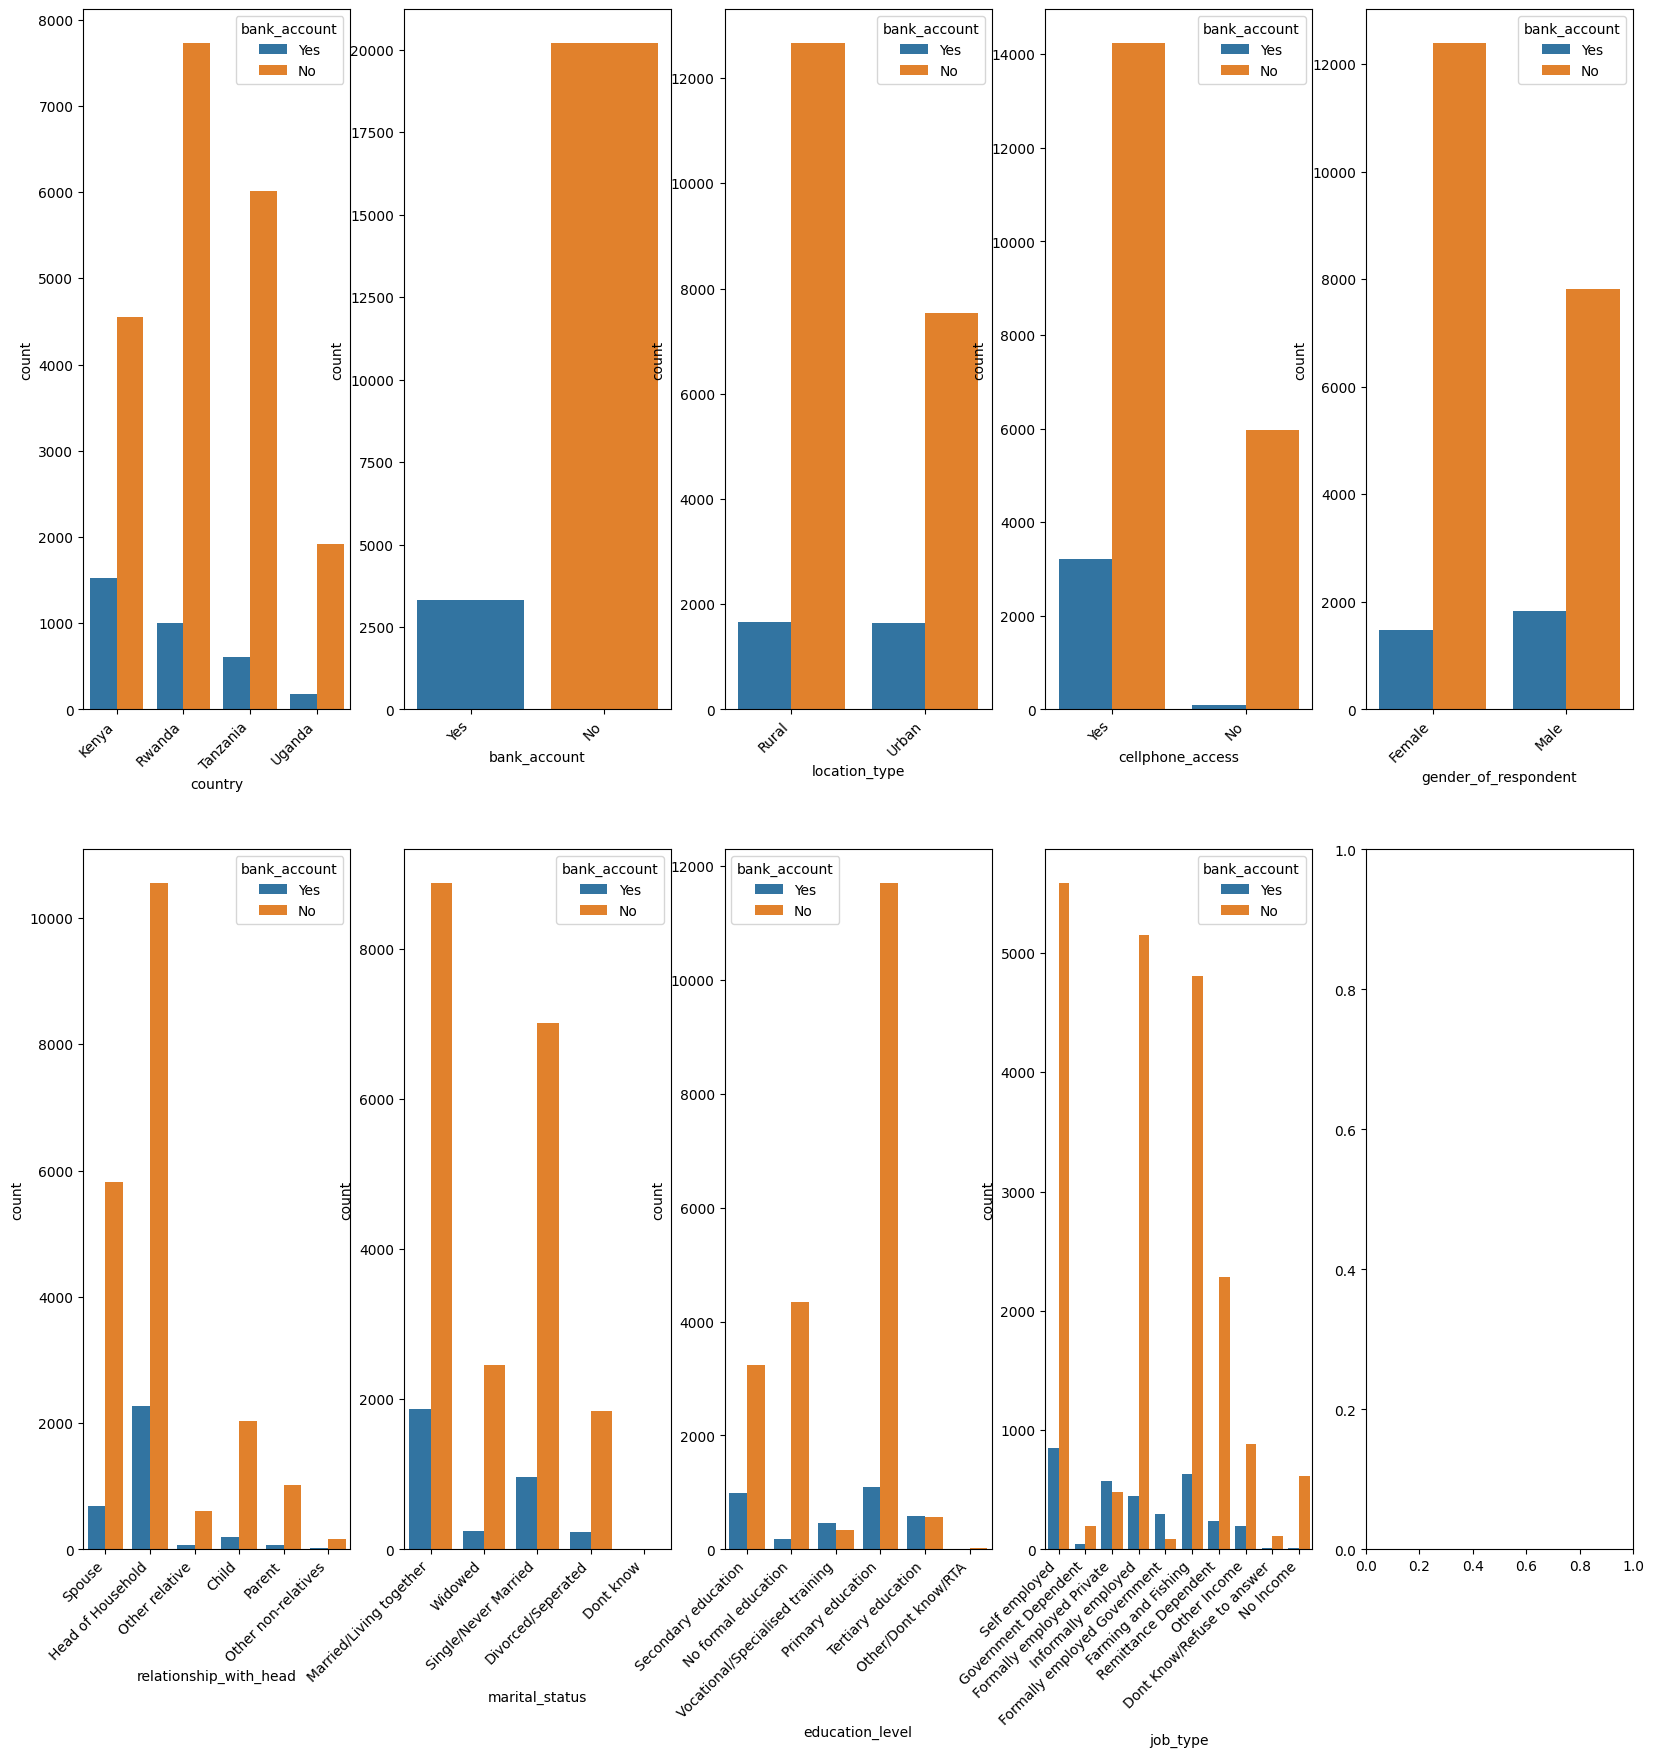

In [7]:
while True: # I used this just because i wanted to declare some local variables
    n_col = 5 #Defining number of columns in the subplots
    n_row = (len(train.select_dtypes(include='O').columns) + n_col -1)//n_col #This will calculate the appropriate number of rows for the plot
    fig, axis = plt.subplots(n_row, n_col, figsize=(20,20))
    axis= axis.flatten() #changing the aces from 2d to an array for easy indexing
    for i,col in enumerate(train.select_dtypes(include='O').columns):
        sns.countplot(data=train,x=col,orient='v',hue='bank_account',ax=axis[i])
        axis[i].set_xticklabels(axis[i].get_xticklabels(),rotation=45, ha = 'right')
    break

### Outlier Analysis

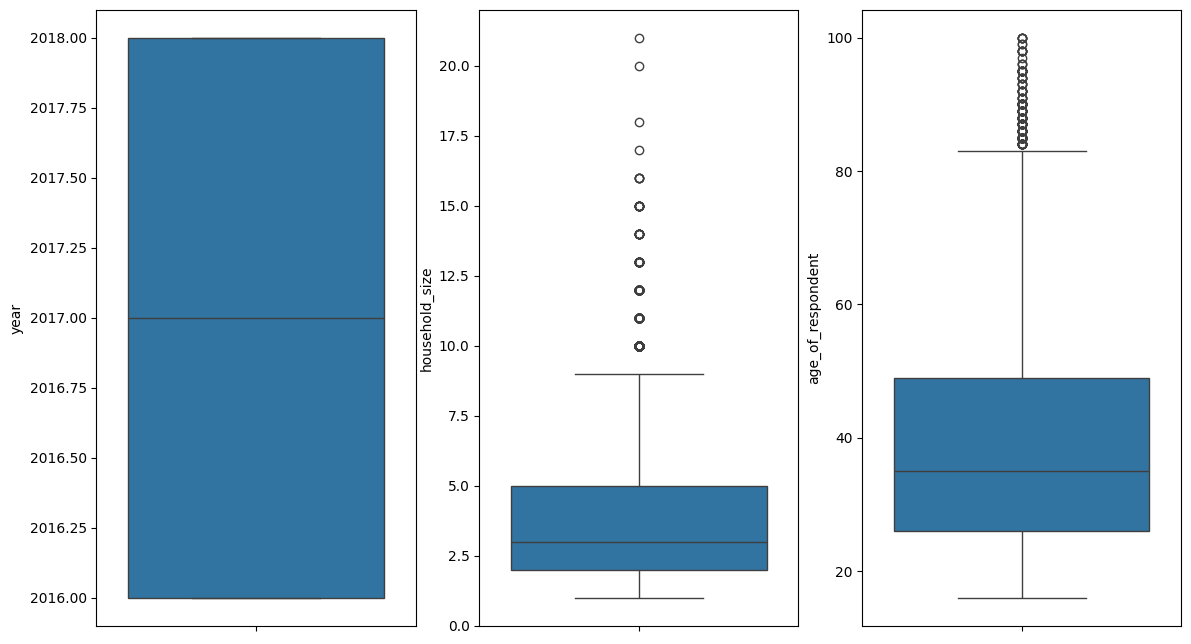

In [8]:
# checking for outliers
while True: # I used this just because i wanted to declare some local variables
    n_col = 3 #Defining number of columns in the subplots
    n_row = (len(train.select_dtypes(exclude='O').columns) + n_col -1)//n_col #This will calculate the appropriate number of rows for the plot
    fig, axis = plt.subplots(n_row, n_col, figsize=(14,8))
    axis= axis.flatten() #changing the aces from 2d to an array for easy indexing
    for i,col in enumerate(train.select_dtypes(exclude='O').columns):
        sns.boxplot(data=train,y=col,orient='v',ax=axis[i])
       # axis[i].set_xticklabels(axis[i].get_xticklabels(),rotation=45, ha = 'right')
    break

From the diagram there are outliers in the household size and age of respondent columns so I'll use min max scaler to treat the outliers


In [9]:
#Initializing the scaler
scaler = MinMaxScaler()
 
columns_to_scale = ['household_size', 'age_of_respondent']

train[columns_to_scale] = scaler.fit_transform(train[columns_to_scale])

### Splitting the data

In [10]:
# splitting the data into features and labels
train_features = train.drop('bank_account', axis=1)
train_label = train.bank_account

In [11]:
#encoding the label
le = LabelEncoder()
train_label = le.fit_transform(train_label)

In [12]:
#lable encoding categorical features
for col in train_features.select_dtypes(include='O').columns:
    train_features[col] = le.fit_transform(train_features[col])
    

In [13]:
#Converting training data to arrays
train_features =train_features.values



In [14]:
#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_features, train_label, test_size=0.2, random_state=42)

## Hyperparameter Tuning
- Initializing models
- Trying different hyperparameters for different models
- Finding the best hyperparameter for the best model


In [15]:
#Initializing models
LR = LogisticRegression(class_weight='balanced')
SVC = SVC()
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
GB = GradientBoostingClassifier()
XGB = XGBClassifier()
LGB = LGBMClassifier()
models = [LR, SVC, DT, RF, GB, XGB, LGB]

In [16]:
#Setting hyperparameters for grid search
param_grid = {'LR':{
                    'max_iter':np.arange(100,5001,1000),
                    'tol':np.logspace(-4,-1,4)},
              
                'SVC':{'C':np.logspace(-3,2,6),
                     'gamma':np.logspace(-3,2,6),
                     'kernel':['linear','rbf']},
              
              'DT':{'max_depth':np.arange(3,21,2),
                    'min_samples_split':np.arange(2,51,5),
                    'min_samples_leaf':np.arange(1,51,5)},
              
              'RF':{'n_estimators':np.arange(100,1001,50),
                    'max_depth':np.arange(3,21,2),
                    'min_samples_split':np.arange(2,51,5),
                    'min_samples_leaf':np.arange(1,51,5)},
              
              'GB':{'n_estimators':np.arange(100,1001,50),
                    'learning_rate':np.logspace(-3,2,6),
                    'max_depth':np.arange(3,21,2)},
    
              'XGB':{'n_estimators': [50, 100, 200, 500],
                      'max_depth': [3, 5, 7, 9],
                      'learning_rate': [0.01, 0.1, 0.5, 1],
                      'gamma': [0, 0.1, 0.5, 1],
                      'subsample': [0.5, 0.7, 0.9, 1],
                      'colsample_bytree': [0.5, 0.7, 0.9, 1],
                      'reg_alpha': [0, 0.1, 0.5, 1],
                      'reg_lambda': [0, 0.1, 0.5, 1]},  
               
              'LGB':{'n_estimators': [50, 100, 200, 500],
                     'max_depth': [-1, 3, 5, 7, 9],
                     'learning_rate': [0.01, 0.1, 0.5, 1],
                     'num_leaves': [31, 62, 127, 255],
                     'min_data_in_leaf': [10, 20, 50, 100],
                     'min_sum_hessian_in_leaf': [1e-3, 1e-2, 1e-1, 1],
                     'colsample_bytree': [0.5, 0.7, 0.9, 1],
                     'reg_alpha': [0, 0.1, 0.5, 1],
                     'reg_lambda': [0, 0.1, 0.5, 1]}}


In [17]:
summary = {'Model':[],
           'Best Parameters':[],
           'Best Score':[],
           'Accuracy':[],
           'Precision':[],
           'Recall':[],
           'f1-score':[]
           } #Dictionary to store the summary of the models

In [18]:
for model, mp in param_grid.items():
    grid_search = RandomizedSearchCV(
        globals()[model], 
        mp, 
        cv=5, 
        scoring='accuracy', 
        n_iter=10,  # Randomly test 25 combinations
        n_jobs=-1,
        refit='accuracy'
    )
    grid_search.fit(X_train, y_train)
    pred = grid_search.predict(X_test)
    summary['Model'].append(model)
    summary['Best Score'].append(grid_search.best_score_)
    summary['Best Parameters'].append(grid_search.best_params_)
    summary['Accuracy'].append(accuracy_score(y_test, pred ))
    summary['Precision'].append(precision_score(y_test, pred ))
    summary['Recall'].append(recall_score(y_test, pred ))
    summary['f1-score'].append(f1_score(y_test, pred ))

  File "c:\Users\A A\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\A A\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\A A\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1036, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                      

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.1
[LightGBM] [Info] Number of positive: 2670, number of negative: 16149
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002866 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 141
[LightGBM] [Info] Number of data points in the train set: 18819, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.

In [19]:
#converting the summary to a dataframe
summary = pd.DataFrame(summary)
#viweing the summary table sorted by accuracy
summary.sort_values('Accuracy', ascending=False)

,Model,Best Parameters,Best Score,Accuracy,Precision,Recall,f1-score
5,XGB,"{'subsample': 1, 'reg_lambda': 0, 'reg_alpha':...",0.885860,0.892242,0.738516,0.325545,0.451892
3,RF,"{'n_estimators': 800, 'min_samples_split': 37,...",0.884691,0.892030,0.729452,0.331776,0.456103
4,GB,"{'n_estimators': 250, 'max_depth': 7, 'learnin...",0.883469,0.889479,0.711806,0.319315,0.440860
6,LGB,"{'reg_lambda': 0.1, 'reg_alpha': 0.1, 'num_lea...",0.884372,0.888842,0.748954,0.278816,0.406356
1,SVC,"{'kernel': 'rbf', 'gamma': 0.1, 'C': 1.0}",0.881769,0.885228,0.727679,0.253894,0.376443
2,DT,"{'min_samples_split': 17, 'min_samples_leaf': ...",0.881716,0.884591,0.664452,0.311526,0.424178
0,LR,"{'tol': 0.0001, 'max_iter': 2100}",0.732505,0.737301,0.312736,0.772586,0.445242


From the summary table containing the best parameters of each of the models with their accuracy in a sorted order, we realize that XGB has the best accuracy of 0.892 with hyperparameters 0f {'tol': np.float64(0.0001), 'max_iter': np.int64(2100)}

displaying the confusion matrix of all the models

In [22]:
fin_model = XGBClassifier(tol= 0.0001, max_iter =2100)
fin_model.fit(X_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_iter=2100,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

Saving the model

In [23]:
import joblib
joblib.dump(fin_model, 'xgb_model.joblib')

['xgb_model.joblib']